<a href="https://colab.research.google.com/github/mzucali/didactics/blob/main/AS3DStereoplotStats/ZinggFlinnPRG_StatsPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*ZINGG FLINN PGR plots of Eigenvalues*
- versione 1 @mzucali 9 novembre 2023

In [2]:
print("ciao AS3D")
a=12
print(a)

ciao AS3D
12


In [3]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import math
from pandas import read_csv, read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
import io
import plotly.express as px

matplotlib: 3.10.0
pandas: 2.2.2
seaborn: 0.13.2


In [31]:
# load DATA FILE
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Eifel_stats.xlsx to Eifel_stats (3).xlsx
User uploaded file "Eifel_stats (3).xlsx" with length 15776 bytes


In [32]:
pippo = read_excel(fn)

In [33]:
pippo.head(3)


,dataset,S1,S2,S3,S1+S2+S3,FlinnX,FlinnY,log(FlinnX),log(Flinny),ZinggX,ZinggY,P,G,R
0,E1_S0,0.6251,0.3627,0.0122,1.0000,29.729508,1.723463,1.473188,0.236402,0.033637,0.580227,0.2624,0.3148,0.0366
1,E1_S1,0.7875,0.2053,0.0073,1.0001,28.123288,3.835850,1.449066,0.583862,0.035558,0.260698,0.5822,0.4106,0.0219


**FLINN** PLOT

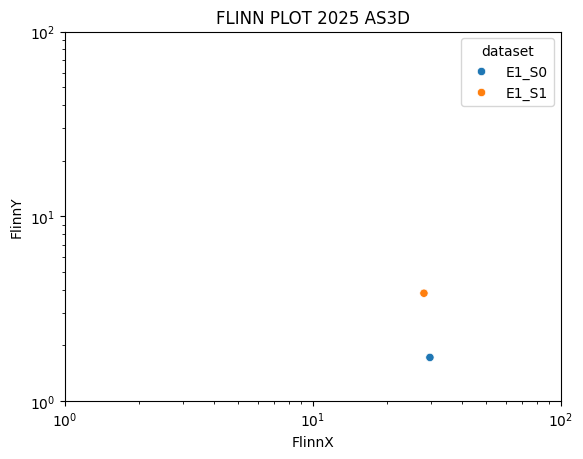

In [21]:
sns.scatterplot(data=pippo, x="FlinnX", y="FlinnY", hue="dataset", marker="o").set_title('FLINN PLOT 2025 AS3D')
# palette=['blue']
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^


# control x and y limits
plt.ylim(10**0, 10**2)
plt.xlim(10**0, 10**2)
#plt.ylim(0,30)
#plt.xlim(0,30)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [34]:
pippo['S3/S2'] = pippo['S3'] / pippo['S2']
pippo['S2/S1'] = pippo['S2'] / pippo['S1']

In [30]:
pippo.head()


,dataset,S1,S2,S3,S1+S2+S3,FlinnX,FlinnY,log(FlinnX),log(Flinny),ZinggX,ZinggY,S2/S3,S2/S1,S3/S2
0,E1_S0,0.6251,0.3627,0.0122,1.0000,29.729508,1.723463,1.473188,0.236402,0.033637,0.580227,29.729508,0.580227,0.033637
1,E1_S1,0.7875,0.2053,0.0073,1.0001,28.123288,3.835850,1.449066,0.583862,0.035558,0.260698,28.123288,0.260698,0.035558


ZINGG PLOT

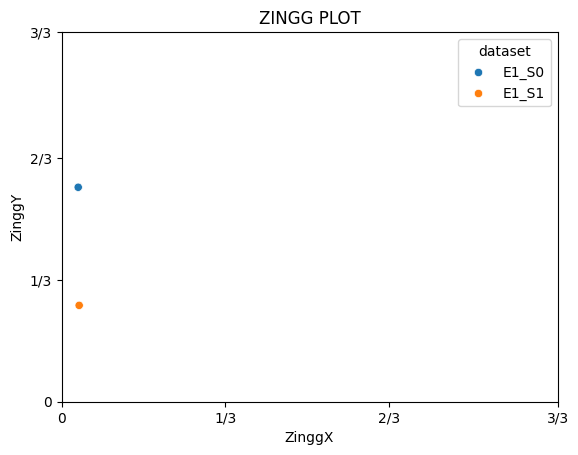

In [25]:
sns.scatterplot(data=pippo, x="ZinggX", y="ZinggY", hue="dataset", marker="o").set_title('ZINGG PLOT')
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI degli assi x e y^^^^^

# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1)
#plt.set_yticks(range(len(data)-5))
#plt.xscale('log')
#plt.yscale('log')
# specify positions of ticks on x-axis and y-axis
plt.xticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.yticks([0, 0.33, 0.66, 1], ['0', '1/3', '2/3', '3/3'])
plt.show()

PGR VOLLMER PLOT

In [36]:
import plotly.express as px

In [37]:
fig = px.scatter_ternary(pippo, a="P", b="G", c="R", color="dataset")
##^^^^ QUI DOVETE CAMBIARE LE INTESTAZIONI dei vertici a,b,c^^^^^
fig.show()